# txt转换csv

In [1]:
# import csv
#
# input_file = "20230516.txt"
# output_file = "20230516.csv"
#
# with open(input_file, 'r') as file:
#     lines = file.readlines()
#
# # 移除行尾的换行符并使用制表符分隔字段
# lines = [line.strip().replace('\t', ',') for line in lines]
#
# with open(output_file, 'w', newline='') as file:
#     writer = csv.writer(file)
#     for line in lines:
#         row = line.split(',')
#         writer.writerow(row)
#
# print(f"成功将 {input_file} 转换为 {output_file} 文件。")

In [2]:
# import csv
#
# # 读取CSV文件
# with open('20230516.csv', 'r') as file:
#     reader = csv.reader(file)
#     data = list(reader)
#
# # 删除第二列
# for row in data:
#     del row[1]
#
# # 保存为新的CSV文件
# with open('20230516.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(data)
#
# print("数据处理完成并保存为新的CSV文件。")

# 数据预处理

In [3]:
import pandas as pd

input_file = "20230516.csv"

# 读取CSV文件并将其转换为DataFrame
raw_data = pd.read_csv(input_file, header=None)

# 添加列名
column_names = ['Time', 'LastPrice', 'Volume', 'Bid1Price', 'Bid1Volume', 'Ask1Price', 'Ask1Volume']
raw_data.columns = column_names

# 打印DataFrame
raw_data

,Time,LastPrice,Volume,Bid1Price,Bid1Volume,Ask1Price,Ask1Volume
0,09:30:00,6084.0,13,6082.0,1,6083.6,1
1,09:30:00,6083.2,18,6075.2,1,6081.6,1
2,09:30:01,6081.6,22,6079.4,1,6081.4,2
3,09:30:01,6081.6,28,6083.6,1,6084.0,2
4,09:30:02,6083.6,33,6080.8,1,6083.6,3
...,...,...,...,...,...,...,...
10015,14:02:10,6040.2,4986,6039.6,2,6040.2,1
10016,14:02:12,6040.2,4986,6039.6,2,6040.0,1
10017,14:02:13,6040.2,4986,6039.6,2,6040.0,2
10018,14:02:14,6040.2,4986,6039.2,2,6040.0,2


# 可视化

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
#
# # 创建DataFrame
# column_names = ['Time', 'LastPrice', 'Volume', 'Bid1Price', 'Bid1Volume', 'Ask1Price', 'Ask1Volume']
# raw_data = pd.read_csv('20230516.csv', names=column_names)
#
# # 可视化Bid和Ask的价格
# plt.plot(raw_data['Time'], raw_data['Bid1.Price'], label='Bid1 Price')
# plt.plot(raw_data['Time'], raw_data['Ask1.Price'], label='Ask1 Price')
#
# # 设置图表标题和标签
# plt.title('Bid and Ask Prices')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
#
# # 显示图表
# plt.show()

In [5]:
import pandas as pd

# 假设您的数据存储在一个名为df的DataFrame中
df = pd.DataFrame(raw_data, columns=column_names)

# 将Time列转换为时间格式
df['Time'] = pd.to_datetime(df['Time'])

# 设置Time列为索引
df.set_index('Time', inplace=True)

# 按秒进行重采样，并计算最大Bid1.Price，最小Ask1.Price，最大Bid1.Volume，最大Ask1.Volume和平均Last.Price
resampled_df = df.resample('S').agg({'Bid1Price': 'max',
                                    'Ask1Price': 'min',
                                    'Bid1Volume': 'max',
                                    'Ask1Volume': 'max',
                                    'LastPrice': 'mean'})

# 保留每秒的Volume列
resampled_df['Volume'] = df.resample('S')['Volume'].last()

# 打印转换后的数据
resampled_df

,Bid1Price,Ask1Price,Bid1Volume,Ask1Volume,LastPrice,Volume
Time,,,,,,
2023-05-20 09:30:00,6082.0,6081.6,1.0,1.0,6083.6,18.0
2023-05-20 09:30:01,6083.6,6081.4,1.0,2.0,6081.6,28.0
2023-05-20 09:30:02,6081.4,6083.6,1.0,3.0,6083.6,33.0
2023-05-20 09:30:03,6083.6,6083.6,6.0,1.0,6082.6,41.0
2023-05-20 09:30:04,6084.0,6085.0,2.0,3.0,6084.6,43.0
...,...,...,...,...,...,...
2023-05-20 14:02:11,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-20 14:02:12,6039.6,6040.0,2.0,1.0,6040.2,4986.0
2023-05-20 14:02:13,6039.6,6040.0,2.0,2.0,6040.2,4986.0


In [6]:
# 获取df前9000行数据
df = df.fillna(method='ffill')

# 储存到新文件夹process_data
df.to_csv('process_data/20230516.csv')

# 建模

In [7]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
#
# # 假设您的数据已经存储在一个名为df的DataFrame中，包含了Time, Ask1.Price, Bid1.Price, Volume等列
#
# # 提取需要预测的列作为目标变量
# target_cols = ['Last.Price']
# target_data = df[target_cols].values
# print(target_data)
#
# # 归一化处理
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(target_data)
#
# # 构建训练集和测试集
# train_ratio = 0.8  # 训练集占总数据的比例
# train_size = int(len(scaled_data) * train_ratio)
#
# train_data = scaled_data[:train_size]
# test_data = scaled_data[train_size:]
#
# # 定义函数，将时间序列数据转换为适用于LSTM的输入数据格式
# def create_sequences(data, seq_length):
#     x = []
#     y = []
#     for i in range(len(data) - seq_length):
#         x.append(data[i:i+seq_length])
#         y.append(data[i+seq_length])
#     return np.array(x), np.array(y)
#
# # 定义序列长度
# sequence_length = 300  # 可根据实际情况调整
#
# # 创建训练集和测试集的序列数据
# x_train, y_train = create_sequences(train_data, sequence_length)
# x_test, y_test = create_sequences(test_data, sequence_length)
#
# # 构建LSTM模型
# model = Sequential()
# model.add(LSTM(64, input_shape=(sequence_length, len(target_cols))))
# model.add(Dense(len(target_cols)))
# model.compile(loss='mse', optimizer='adam')
#
# # 训练模型
# model.fit(x_train, y_train, epochs=5, batch_size=32)
#
# # 在测试集上进行预测
# predictions = model.predict(x_test)
#
# # 将预测结果逆归一化
# predictions = scaler.inverse_transform(predictions)
#
# # 打印预测结果
# predicted_data = pd.DataFrame(predictions, columns=target_cols)
# print(predicted_data)


In [8]:
df

,LastPrice,Volume,Bid1Price,Bid1Volume,Ask1Price,Ask1Volume
Time,,,,,,
2023-05-20 09:30:00,6084.0,13,6082.0,1,6083.6,1
2023-05-20 09:30:00,6083.2,18,6075.2,1,6081.6,1
2023-05-20 09:30:01,6081.6,22,6079.4,1,6081.4,2
2023-05-20 09:30:01,6081.6,28,6083.6,1,6084.0,2
2023-05-20 09:30:02,6083.6,33,6080.8,1,6083.6,3
...,...,...,...,...,...,...
2023-05-20 14:02:10,6040.2,4986,6039.6,2,6040.2,1
2023-05-20 14:02:12,6040.2,4986,6039.6,2,6040.0,1
2023-05-20 14:02:13,6040.2,4986,6039.6,2,6040.0,2


In [9]:
import pandas as pd

# 假设您的数据存储在一个名为 df 的 DataFrame 中
trade_df = df
# 计算未来 10 秒的平均价格
trade_df['FutureAvgPrice'] = trade_df['LastPrice'].rolling(window=10).mean().shift(-10)

# 根据策略生成交易信号
trade_df['Traded'] = (trade_df['FutureAvgPrice'] > df['LastPrice']).astype(int)

# 打印更新后的数据集
trade_df

,LastPrice,Volume,Bid1Price,Bid1Volume,Ask1Price,Ask1Volume,FutureAvgPrice,Traded
Time,,,,,,,,
2023-05-20 09:30:00,6084.0,13,6082.0,1,6083.6,1,6083.26,0
2023-05-20 09:30:00,6083.2,18,6075.2,1,6081.6,1,6083.44,1
2023-05-20 09:30:01,6081.6,22,6079.4,1,6081.4,2,6083.78,1
2023-05-20 09:30:01,6081.6,28,6083.6,1,6084.0,2,6083.98,1
2023-05-20 09:30:02,6083.6,33,6080.8,1,6083.6,3,6083.98,1
...,...,...,...,...,...,...,...,...
2023-05-20 14:02:10,6040.2,4986,6039.6,2,6040.2,1,NaN,0
2023-05-20 14:02:12,6040.2,4986,6039.6,2,6040.0,1,NaN,0
2023-05-20 14:02:13,6040.2,4986,6039.6,2,6040.0,2,NaN,0


In [10]:
# 计算Traded0和1的数量
trade_df['Traded'].value_counts()

0    6145
1    3875
Name: Traded, dtype: int64

In [11]:
# 储存到新文件夹process_data
# df.to_csv('process_data/20230516_labeled.csv')

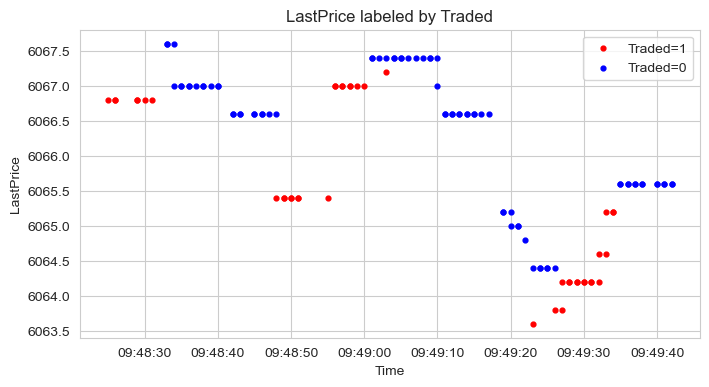

In [42]:
import matplotlib.pyplot as plt
plot_df = trade_df[2000:2120]
size = 12
# 创建画布和坐标
fig, ax = plt.subplots()
# 绘制红色的LastPrice（当Traded为1时）

ax.scatter(plot_df.index[plot_df['Traded'] == 1], plot_df['LastPrice'][plot_df['Traded'] == 1], color='red', label='Traded=1',s=size)

# 绘制蓝色的LastPrice（当Traded为0时）
ax.scatter(plot_df.index[plot_df['Traded'] == 0], plot_df['LastPrice'][plot_df['Traded'] == 0], color='blue', label='Traded=0',s=size)

# 设置标题和坐标轴标签
ax.set_title('LastPrice labeled by Traded')
ax.set_xlabel('Time')
ax.set_ylabel('LastPrice')
# 添加图例
ax.legend()
# 设置画布大小，使其横向更长
fig.set_size_inches(8, 4)  # 可根据需要调整宽度和高度
# 显示图形
plt.show()

# 策略

In [13]:
# import pandas as pd
#
# # 假设您的数据存储在一个名为trade_df的DataFrame中
# trade_df = pd.DataFrame(trade_df, columns=['LastPrice', 'Volume', 'Bid1Price', 'Bid1Volume', 'Ask1Price', 'Ask1Volume', 'Traded'])
#
# # 创建新的整数列作为索引
# trade_df['Index'] = range(len(trade_df))
# trade_df.set_index('Index', inplace=True)
#
# # 初始化初始资金和持仓标志位
# initial_capital = 100000  # 初始资金
# position = None  # 当前持仓状态，None表示初始状态，"全仓"表示全仓状态，"空仓"表示空仓状态
#
# # 初始化交易盈利
# profit = 0
#
# # 遍历每一行的数据
# for i in range(len(trade_df)-10):
#     current_price = trade_df.loc[i, 'LastPrice']
#     next_prices = trade_df.loc[i+1:i+10, 'LastPrice']
#     traded = trade_df.loc[i, 'Traded']
#
#     # 判断未来10秒的价格是否均高于当前价格
#     if (next_prices > current_price).all() and traded == 1:
#         # 全仓买入
#         profit -= initial_capital
#         position = "全仓"
#         print("Buy at ", current_price[i])
#
#     elif (next_prices <= current_price).any() and traded == 0:
#         # 空仓卖出
#         profit += initial_capital
#         position = "空仓"
#         print("Sell at ", i)
#
#     else:
#         print("Hold at ", i)
#
# # 计算最终余额
# final_balance = initial_capital + profit
#
# # 打印最终结果
# print("Initial Capital: ", initial_capital)
# print("Final Balance: ", final_balance)
# print("Profit: ", profit)


In [14]:
# trade_df = df
# # 假设您的数据存储在一个名为trade_df的DataFrame中
# trade_df = pd.DataFrame(trade_df, columns=['LastPrice', 'Volume', 'Bid1Price', 'Bid1Volume', 'Ask1Price', 'Ask1Volume', 'Traded'])
#
# # 创建新的整数列作为索引
# trade_df['Index'] = range(len(trade_df))
# trade_df.set_index('Index', inplace=True)
#
# import pandas as pd
#
# # 创建DataFrame
# data = trade_df
#
# df = pd.DataFrame(data)
#
# # 全仓买入或卖出
# position = 0  # 0代表空仓，1代表持仓
# buy_price = 0.0
# sell_price = 0.0
#
# for i in range(len(df)):
#     current_price = df.loc[i, 'LastPrice']
#     future_prices = df.loc[i+1:i+10, 'LastPrice']
#
#     if position == 0 and all(future_price < current_price for future_price in future_prices):
#         # 未来10秒的价格都低于当前价格，进行全仓买入
#         position = 1
#         buy_price = current_price
#         print(f"买入价格: {buy_price}")
#     elif position == 1 and all(future_price > current_price for future_price in future_prices):
#         # 未来10秒的价格都高于当前价格，进行全仓卖出
#         position = 0
#         sell_price = current_price
#         print(f"卖出价格: {sell_price}")
#
# if position == 1:
#     # 如果最后仍持仓，则按当前价格卖出
#     sell_price = current_price
#     print(f"卖出价格: {sell_price}")
#
# profit = sell_price - buy_price
# print(f"盈利: {profit}")


# 合并数据

In [15]:
import pandas as pd

text = 'process_data/20230516_labeled.csv'
# 读取数据
data = pd.read_csv(text)

# 将数据中的日期转换为datetime对象
data['Time'] = pd.to_datetime(data['Time'])

# 将日期替换为5月8日
data['Time'] = data['Time'].apply(lambda x: x.replace(month=5, day=16))

data
# 保存修改后的数据到源文件
data.to_csv(text, index=False)

In [16]:
import pandas as pd

# 要合并的文件列表
file_list = ['process_data/20230508_labeled.csv', 'process_data/20230510_labeled.csv', 'process_data/20230511_labeled.csv', 'process_data/20230512_labeled.csv', 'process_data/20230515_labeled.csv']

# 创建一个空的DataFrame用于存储合并后的数据
merged_data = pd.DataFrame()

# 遍历文件列表，逐个读取文件并合并数据
for file in file_list:
    data = pd.read_csv(file)
    merged_data = pd.concat([merged_data, data])

# 保存合并后的数据到新文件
merged_data.to_csv('process_data/merged_data_0508_0515.csv', index=False)

In [17]:
merged_data

,Time,LastPrice,Volume,Bid1Price,Bid1Volume,Ask1Price,Ask1Volume,FutureAvgPrice,Traded
0,2023-05-08 09:30:00,6117.0,7,6113.0,1,6116.0,1,6115.44,0
1,2023-05-08 09:30:00,6116.0,9,6115.6,2,6118.8,1,6115.54,0
2,2023-05-08 09:30:01,6114.2,13,6113.8,1,6118.2,2,6115.82,1
3,2023-05-08 09:30:01,6114.2,15,6115.4,1,6117.6,2,6115.70,1
4,2023-05-08 09:30:02,6117.4,25,6116.0,1,6117.4,2,6115.26,0
...,...,...,...,...,...,...,...,...,...
10899,2023-05-15 14:59:58,6083.4,9403,6083.4,1,6084.2,1,NaN,0
10900,2023-05-15 15:00:00,6083.4,9403,6083.4,1,6084.2,1,NaN,0
10901,2023-05-15 15:33:16,6083.4,9403,6083.4,1,6084.2,1,NaN,0
10902,2023-05-15 15:37:49,6083.4,9403,6083.4,1,6084.2,1,NaN,0
